# Conformational ensembles generation, data representation and visualization of predicted flexibility properties using BioExcel Building Blocks (biobb) and FlexDyn tools

## Workflow included in the [ELIXIR 3D-Bioinfo](https://elixir-europe.org/communities/3d-bioinfo) Implementation Study:

### _Building on PDBe-KB to chart and characterize the conformation landscape of native proteins_

***

This tutorial aims to illustrate the process of generating **protein conformational ensembles** from **3D structures** and analysing its **molecular flexibility**, step by step, using the **BioExcel Building Blocks library (biobb)**. 

## Conformational landscape of native proteins

**Proteins** are **dynamic** systems that adopt multiple **conformational states**, a property essential for many **biological processes** (e.g. binding other proteins, nucleic acids, small molecule ligands, or switching between functionaly active and inactive states). Characterizing the different **conformational states** of proteins and the transitions between them is therefore critical for gaining insight into their **biological function** and can help explain the effects of genetic variants in **health** and **disease** and the action of drugs.

**Structural biology** has become increasingly efficient in sampling the different **conformational states** of proteins. The **PDB** has currently archived more than **170,000 individual structures**, but over two thirds of these structures represent **multiple conformations** of the same or related protein, observed in different crystal forms, when interacting with other proteins or other macromolecules, or upon binding small molecule ligands. Charting this conformational diversity across the PDB can therefore be employed to build a useful approximation of the **conformational landscape** of native proteins.

A number of resources and **tools** describing and characterizing various often complementary aspects of protein **conformational diversity** in known structures have been developed, notably by groups in Europe. These tools include algorithms with varying degree of sophistication, for aligning the 3D structures of individual protein chains or domains, of protein assemblies, and evaluating their degree of **structural similarity**. Using such tools one can **align structures pairwise**, compute the corresponding **similarity matrix**, and identify ensembles of **structures/conformations** with a defined **similarity level** that tend to recur in different PDB entries, an operation typically performed using **clustering** methods. Such workflows are at the basis of resources such as **CATH, Contemplate, or PDBflex** that offer access to **conformational ensembles** comprised of similar **conformations** clustered according to various criteria. Other types of tools focus on differences between **protein conformations**, identifying regions of proteins that undergo large **collective displacements** in different PDB entries, those that act as **hinges or linkers**, or regions that are inherently **flexible**.

To build a meaningful approximation of the **conformational landscape** of native proteins, the **conformational ensembles** (and the differences between them), identified on the basis of **structural similarity/dissimilarity** measures alone, need to be **biophysically characterized**. This may be approached at **two different levels**. 
- At the **biological level**, it is important to link observed **conformational ensembles**, to their **functional roles** by evaluating the correspondence with **protein family classifications** based on sequence information and **functional annotations** in public databases e.g. Uniprot, PDKe-Knowledge Base (KB). These links should provide valuable mechanistic insights into how the **conformational and dynamic properties** of proteins are exploited by evolution to regulate their **biological function**. <br><br>

- At the **physical level** one needs to introduce **energetic consideration** to evaluate the likelihood that the identified **conformational ensembles** represent **conformational states** that the protein (or domain under study) samples in isolation. Such evaluation is notoriously **challenging** and can only be roughly approximated by using **computational methods** to evaluate the extent to which the observed **conformational ensembles** can be reproduced by algorithms that simulate the **dynamic behavior** of protein systems. These algorithms include the computationally expensive **classical molecular dynamics (MD) simulations** to sample local thermal fluctuations but also faster more approximate methods such as **Elastic Network Models** and **Normal Node Analysis** (NMA) to model low energy **collective motions**. Alternatively, **enhanced sampling molecular dynamics** can be used to model complex types of **conformational changes** but at a very high computational cost. 

The **ELIXIR 3D-Bioinfo Implementation Study** *Building on PDBe-KB to chart and characterize the conformation landscape of native proteins* focuses on:

1. Mapping the **conformational diversity** of proteins and their homologs across the PDB. 
2. Characterize the different **flexibility properties** of protein regions, and link this information to sequence and functional annotation.
3. Benchmark **computational methods** that can predict a biophysical description of protein motions.

This notebook is part of the third objective, where a list of **computational resources** that are able to predict **protein flexibility** and **conformational ensembles** have been collected, evaluated, and integrated in reproducible and interoperable workflows using the **BioExcel Building Blocks library**. Note that the list is not meant to be exhaustive, it is built following the expertise of the implementation study partners.

The list of the selected **tools** is given in the following table, classified based on the underlying **theoretical methods types**, and presented together with the corresponding publication DOIs and URLs:


| Tool | URL | Reference | Conda | Type
| :-: | :-: | :-: | :-: | :-: |
| **Concoord** | [URL](https://www3.mpibpc.mpg.de/groups/de_groot/concoord/concoord.html)| [Reference](https://doi.org/10.1002/(sici)1097-0134(199710)29:2%3C240::aid-prot11%3E3.0.co;2-o) | [Conda](https://anaconda.org/bioconda/concoord) | Atomistic intra-molecular interactions |
| **ProDy** | [URL](https://prody.csb.pitt.edu/) | [Reference](https://doi.org/10.1093/bioinformatics/btab187) | [Conda](https://anaconda.org/conda-forge/prody) | Vibrational Analysis
| **FlexServ** | [URL](https://mmb.irbbarcelona.org/FlexServ/) | [Reference](https://doi.org/10.1093/bioinformatics/btp304) | [Conda](https://anaconda.org/bioconda/flexserv) | Vibrational Analysis, Coarse-Grained MD
| | | | | |
| **NOLB** | [URL](https://team.inria.fr/nano-d/software/nolb-normal-modes) | [Reference](https://doi.org/10.1101/2020.12.31.424963) | [Conda](https://anaconda.org/bioconda/nolb) | Vibrational Analysis, Atomistic intra-molecular interactions
| **iMod** | [URL](https://imods.chaconlab.org/) | [Reference](https://doi.org/10.1093/nar/gku339) | [Conda](https://anaconda.org/bioconda/imods) | Vibrational Analysis, Atomistic intra-molecular interactions

where the **theoretical methods types** are:

* **Vibrational analysis**: 
Tools computing the vibrational normal modes of protein three-dimensional structures, taking as input PDB or mmCIF files. The movements associated with the vibrational modes (i.e. the eigenvectors) are known to be good descriptors of proteins dynamics, and of their flexibility. The type of output delivered by the different modes varies from protein motions to conformational ensembles.


* **Coarse-grained molecular simulations**: 
Tools in this category make use of coarse-grained representations of the proteins and of molecular simulation techniques to generate conformational ensembles.   


* **Atomistic intra-molecular interactions**: 
Such tools make use of a potential to represent intra-molecular interactions and predict likely conformational changes in a protein structure.

The notebook is divided in two main blocks:

* **Conformational ensemble generation**: where the different selected methods are used to build **conformational ensembles** that are then visualized using the NGL viewer.
* **Macromolecular flexibility analysis**: where the generated ensembles are analysed to extract **flexibility properties** that will be used in subsequent comparisons with the **conformational diversity** and **flexiblity** observed in the **PDB database**. 

***

## Settings

### Biobb modules used

 - [biobb_flexserv](https://github.com/bioexcel/biobb_flexserv): Tools to compute biomolecular flexibility on protein 3D structures.
 - [biobb_flexdyn](https://github.com/bioexcel/biobb_flexdyn): Tools to study the conformational landscape of native proteins.
 - [biobb_io](https://github.com/bioexcel/biobb_io): Tools to fetch biomolecular data from public databases.
 - [biobb_structure_utils](https://github.com/bioexcel/biobb_structure_utils): Tools to modify or extract information from a PDB structure.
 - [biobb_analysis](https://github.com/bioexcel/biobb_analysis): Tools to analyse Molecular Dynamics trajectories.
 - [biobb_gromacs](https://github.com/bioexcel/biobb_gromacs): Tools to setup and run Molecular Dynamics simulations with GROMACS MD package.
  
### Auxiliary libraries used

* [jupyter](https://jupyter.org/): Free software, open standards, and web services for interactive computing across all programming languages.
* [plotly](https://plot.ly/python/offline/): Python interactive graphing library integrated in Jupyter notebooks.
* [nglview](https://nglviewer.org/#nglview): Jupyter/IPython widget to interactively view molecular structures and trajectories in notebooks.
* [simpletraj](https://github.com/arose/simpletraj): Lightweight coordinate-only trajectory reader based on code from GROMACS, MDAnalysis and VMD.
* [pandas](https://pandas.pydata.org/): Open source data analysis and manipulation tool, built on top of the Python programming language.

### Conda Installation and Launch

Take into account that, for this specific workflow, there are two environment files, one for linux OS and the other for mac OS:

```console
git clone https://github.com/bioexcel/biobb_wf_flexdyn.git
cd biobb_wf_flexdyn
conda env create -f conda_env/environment.yml
conda activate biobb_wf_flexdyn
jupyter-notebook biobb_wf_flexdyn/notebooks/biobb_wf_flexdyn.ipynb
```

***
## Pipeline steps
 1. [Input Parameters](#input)
 2. [Fetching PDB structure](#fetch)
 3. [Conformational Ensemble Generation](#ensemble)
  1. [CONCOORD](#concoord)
  2. [PRODY](#prody)
  3. [FLEXSERV](#flexserv)
       1. [Brownian Dynamics (BD)](#bd)
       2. [Discrete Molecular Dynamics (DMD)](#dmd)
       3. [Normal Model Analysis (NMA)](#nma)
  4. [NOLB](#nolb)
  5. [iMOD](#imod)
 4. [Meta-trajectory & Clustering](#metatraj)  
 5. [Macromolecular Flexibility Analyses](#flexibility)
  1. [Principal Component Analysis](#pca)
  2. [B-Factor x Principal Components](#bfactor)
  3. [Hinge Points Prediction](#hinges)
  4. [Apparent Stiffness](#stiffness)
  5. [Collectivity index](#collectivity)
 

***
<table>
    <tr style="background: white;"><td>
        <img src="https://bioexcel.eu/wp-content/uploads/2019/04/Bioexcell_logo_1080px_transp.png" alt="Bioexcel2 logo"
            title="Bioexcel logo" width="400" />
    </td>
        <td style="width: 100px;"></td>
    <td>
        <img src="https://cdn.eventscase.com/elixirevents.eventscase.com/uploads/users/711598/uploads/d0c5cffb09bfcac4df9bea35a8bc66bc225bf1a59701eb40a86d0449c81671cfc9cbb1163a5bc53d2dbd89a2e16bc4c0cb7d.610bafb9be1e9.png" alt="3D-Bioinfo logo"
            title="3D-Bioinfo logo" width="250" />
    </td></tr>
</table>


***

## Initializing colab

The three cells below are used only in case this notebook is executed via **Google Colab**. Take into account that, for running conda on **Google Colab**, the **condacolab** library must be installed. As [explained here](https://pypi.org/project/condacolab/), the installation requires a **kernel restart**, so when running this notebook in **Google Colab**, don't run all cells until this **installation** is properly **finished** and the **kernel** has **restarted**.

In [1]:
# Only executed when using google colab
import sys
if 'google.colab' in sys.modules:
  !git clone https://github.com/bioexcel/biobb_wf_flexdyn.git
  !pip install -q condacolab
  import condacolab
  condacolab.install()

In [2]:
if 'google.colab' in sys.modules: 
  # Install conda environment
  !mamba env update -n base -f biobb_wf_flexdyn/conda_env/environment.yml
  # Fix Python path to prioritize conda packages
  conda_path = '/usr/local'
  sys.path.insert(0, f'{conda_path}/lib/python3.11/site-packages')
  # Enable widgets for colab
  from google.colab import output 
  output.enable_custom_widget_manager() 
  # Change working dir
  import os 
  os.chdir("biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks") 
  print(f"New working directory: {os.getcwd()}")

In [3]:
# Store original Colab paths
ORIGINAL_PATHS = [p for p in sys.path if '/usr/local/lib/python3.12' in p or 'dist-packages' in p]
CONDA_PATHS = [p for p in sys.path if '/usr/local/lib/python3.11' in p]

def use_colab_plotly():
    """Switch to Colab's original plotly"""
    # Move Colab paths to the front
    for path in reversed(ORIGINAL_PATHS):
        if path in sys.path:
            sys.path.remove(path)
        sys.path.insert(0, path)
    
    # Reload plotly and nbformat from Colab's environment
    if 'plotly' in sys.modules:
        del sys.modules['plotly']
        del sys.modules['plotly.graph_objs']
        # del sys.modules['plotly.io']
        # Delete all plotly submodules
        to_delete = [m for m in sys.modules if m.startswith('plotly')]
        for m in to_delete:
            del sys.modules[m]
    if 'nbformat' in sys.modules:
        del sys.modules['nbformat']

def use_conda_env():
    """Switch back to conda environment"""
    # Move conda paths to the front
    for path in reversed(CONDA_PATHS):
        if path in sys.path:
            sys.path.remove(path)
        sys.path.insert(0, path)
    
    # Clean up Colab's plotly/nbformat so conda versions load next time
    if 'plotly' in sys.modules:
        to_delete = [m for m in sys.modules if m.startswith('plotly')]
        for m in to_delete:
            del sys.modules[m]
    if 'nbformat' in sys.modules:
        del sys.modules['nbformat']

<a id="input"></a>
## Input parameters
**Input parameters** needed:

 - **Auxiliary libraries**: Libraries to be used in the workflow are imported once at the beginning
<br><br>
 - **pdbCode**: PDB code of the protein structure (e.g. 1AKE, [https://doi.org/10.2210/pdb1AKE/pdb](https://doi.org/10.2210/pdb1AKE/pdb))

In [6]:
import os
import nglview
import simpletraj
import sys
import numpy as np
import pandas as pd
import ipywidgets
import json
import zipfile
from IPython.display import display, Markdown
import plotly.graph_objs as go

pdbCode = "1ake"
num_frames = 300

<a id="fetch"></a>
***
## Fetching PDB structure
Downloading **PDB structure** with the **protein molecule** from the RCSB PDB database.<br>
Alternatively, a **PDB file** can be used as starting structure. <br>
***
**Building Blocks** used:
 - [Pdb](https://biobb-io.readthedocs.io/en/latest/api.html#module-api.pdb) from **biobb_io.api.pdb**
***

In [7]:
# Downloading desired PDB file 
# Import module
from biobb_io.api.pdb import pdb

# Create properties dict and inputs/outputs
downloaded_pdb = pdbCode+'.pdb'

prop = {
    'pdb_code': pdbCode,
    'api_id' : 'pdbe'
}

#Create and launch bb
pdb(output_pdb_path=downloaded_pdb,
    properties=prop)

2026-02-12 09:28:39,489 [MainThread  ] [INFO ]  Module: biobb_io.api.pdb Version: 5.2.0
2026-02-12 09:28:39,490 [MainThread  ] [INFO ]  Downloading 1ake from: https://www.ebi.ac.uk/pdbe/entry-files/download/pdb1ake.ent
2026-02-12 09:28:39,854 [MainThread  ] [INFO ]  Writting pdb to: 1ake.pdb
2026-02-12 09:28:39,857 [MainThread  ] [INFO ]  Filtering lines NOT starting with one of these words: ['ATOM', 'MODEL', 'ENDMDL']
2026-02-12 09:28:39,886 [MainThread  ] [INFO ]  


0

***
### Selecting a model
If needed, select a single **model** from the **PDB file**. <br>
***
**Building Blocks** used:
 - [extract_model](https://biobb-structure-utils.readthedocs.io/en/latest/utils.html#module-utils.extract_model) from **biobb_structure_utils.utils.extract_model**
***

In [8]:
from biobb_structure_utils.utils.extract_model import extract_model

pdb_model = pdbCode+'_model.pdb'

prop = {
    'models': [ 1 ]
}

extract_model(input_structure_path=downloaded_pdb,
              output_structure_path=pdb_model,
              properties=prop)

2026-02-12 09:28:42,147 [MainThread  ] [INFO ]  Module: biobb_structure_utils.utils.extract_model Version: 5.2.0
2026-02-12 09:28:42,151 [MainThread  ] [INFO ]  Directory successfully created: /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_8d3796c0-6ea1-493e-a472-4e4e43b0974a
2026-02-12 09:28:42,152 [MainThread  ] [INFO ]  Copy to stage: /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/1ake.pdb --> sandbox_8d3796c0-6ea1-493e-a472-4e4e43b0974a
2026-02-12 09:28:42,155 [MainThread  ] [INFO ]  Creating 49d6169a-77be-49c4-b04d-b23ea24200a3 temporary folder
2026-02-12 09:28:42,156 [MainThread  ] [INFO ]  Launching command (it may take a while): check_structure -i /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_8d3796c0-6ea1-493e-a472-4e4e43b0974a/1ake.pdb -o 49d6169a-77be-49c4-b04d-b23ea24200a3/model1.pdb --force_save models --select 1
2026-02-12 09:28:43,220 [MainTh

0

***
### Selecting a monomer
If needed, select a single **monomer** (chain) from the **PDB file**. <br>
***
**Building Blocks** used:
 - [extract_chain](https://biobb-structure-utils.readthedocs.io/en/latest/utils.html#module-utils.extract_chain) from **biobb_structure_utils.utils.extract_chain**
***

In [9]:
from biobb_structure_utils.utils.extract_chain import extract_chain

monomer = pdbCode+'_monomer.pdb'

prop = {
    'chains': [ 'A' ]
}

extract_chain(input_structure_path=pdb_model,
            output_structure_path=monomer,
            properties=prop)

2026-02-12 09:28:46,445 [MainThread  ] [INFO ]  Module: biobb_structure_utils.utils.extract_chain Version: 5.2.0
2026-02-12 09:28:46,450 [MainThread  ] [INFO ]  Directory successfully created: /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_462c5826-0f32-47d7-a72f-ad946ebcf4a0
2026-02-12 09:28:46,452 [MainThread  ] [INFO ]  Copy to stage: /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/1ake_model.pdb --> sandbox_462c5826-0f32-47d7-a72f-ad946ebcf4a0
2026-02-12 09:28:46,455 [MainThread  ] [INFO ]  Selected Chains: A
2026-02-12 09:28:46,456 [MainThread  ] [INFO ]  Launching command (it may take a while): check_structure -i /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/1ake_model.pdb -o 1ake_monomer.pdb --force_save chains --select A
2026-02-12 09:28:46,819 [MainThread  ] [INFO ]  Command 'check_structure -i /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb

0

***
### Visualizing the protein
***

In [11]:
# Show protein
view = nglview.show_structure_file(monomer)
view.add_representation(repr_type='ball+stick', selection='all')
view._remote_call('setSize', target='Widget', args=['','600px'])
view

NGLWidget()

***
### Generating the reduced (coarse-grained) structure (backbone)

***
**Building Blocks** used:
 - [cpptraj_mask](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_mask) from **biobb_analysis.ambertools.cpptraj_mask**
***

In [12]:
from biobb_analysis.ambertools.cpptraj_mask import cpptraj_mask

prot_backbone = pdbCode + "_backbone.pdb"

prop = {
    'mask': 'backbone',
    'format': 'pdb'
}

cpptraj_mask(input_top_path=monomer,
            input_traj_path=monomer,
            output_cpptraj_path=prot_backbone,
            properties=prop)


2026-02-12 09:28:53,037 [MainThread  ] [INFO ]  Module: biobb_analysis.ambertools.cpptraj_mask Version: 5.2.0
2026-02-12 09:28:53,038 [MainThread  ] [INFO ]  Directory successfully created: /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_f1df24d6-317f-4c63-97c7-d637710e23ea
2026-02-12 09:28:53,040 [MainThread  ] [INFO ]  Copy to stage: 1ake_monomer.pdb --> sandbox_f1df24d6-317f-4c63-97c7-d637710e23ea
2026-02-12 09:28:53,042 [MainThread  ] [INFO ]  Copy to stage: 1ake_monomer.pdb --> sandbox_f1df24d6-317f-4c63-97c7-d637710e23ea
2026-02-12 09:28:53,043 [MainThread  ] [INFO ]  Launching command (it may take a while): cpptraj -i /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_f1df24d6-317f-4c63-97c7-d637710e23ea/cbc2c60f-db06-4c87-954b-a20677bce90einstructions.in
2026-02-12 09:29:01,052 [MainThread  ] [INFO ]  Command 'cpptraj -i /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexd

0

***
### Visualizing the protein
***

In [13]:
# Show protein
view = nglview.show_structure_file(prot_backbone)
view.add_representation(repr_type='ball+stick', selection='all')
view._remote_call('setSize', target='Widget', args=['','600px'])
view

NGLWidget()

***
### Generating the reduced (coarse-grained) structure (alpha carbons)

***
**Building Blocks** used:
 - [cpptraj_mask](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_mask) from **biobb_analysis.ambertools.cpptraj_mask**
***

In [14]:
from biobb_analysis.ambertools.cpptraj_mask import cpptraj_mask

prot_ca = pdbCode + "_ca.pdb"

prop = {
    'mask': 'c-alpha',
    'format': 'pdb'
}

cpptraj_mask(input_top_path=monomer,
            input_traj_path=monomer,
            output_cpptraj_path=prot_ca,
            properties=prop)

2026-02-12 09:29:15,015 [MainThread  ] [INFO ]  Module: biobb_analysis.ambertools.cpptraj_mask Version: 5.2.0
2026-02-12 09:29:15,018 [MainThread  ] [INFO ]  Directory successfully created: /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_7281d602-50bc-46d1-84d1-7cc89da67927
2026-02-12 09:29:15,019 [MainThread  ] [INFO ]  Copy to stage: 1ake_monomer.pdb --> sandbox_7281d602-50bc-46d1-84d1-7cc89da67927
2026-02-12 09:29:15,023 [MainThread  ] [INFO ]  Copy to stage: 1ake_monomer.pdb --> sandbox_7281d602-50bc-46d1-84d1-7cc89da67927
2026-02-12 09:29:15,026 [MainThread  ] [INFO ]  Launching command (it may take a while): cpptraj -i /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_7281d602-50bc-46d1-84d1-7cc89da67927/bd769cbf-5d0a-4f1a-ba5f-56317c1c7dd9instructions.in
2026-02-12 09:29:15,194 [MainThread  ] [INFO ]  Command 'cpptraj -i /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexd

0

***
### Visualizing the protein
***

In [15]:
# Show protein
view = nglview.show_structure_file(prot_ca)
view.add_representation(repr_type='ball+stick', selection='all')
view.center()
view._remote_call('setSize', target='Widget', args=['','600px'])
view

NGLWidget()

<a id="ensemble"></a>
***
## Conformational Ensemble Generation

The next section is presenting a list of **computational resources** able to predict **protein flexibility** and **conformational ensembles** (the list is not meant to be exhaustive).

The notebook is intended to give an overview of the tools and resources considered relevant for the **implementation study**, namely tools that can be used to **generate** or **characterize conformational ensembles of proteins**. 

<a id="concoord"></a>
***
## CONCOORD

**CONCOORD** is a method to generate **protein conformations** around a known structure based on **geometric restrictions**. **Principal component analyses** of **Molecular Dynamics** (MD) simulations of proteins have indicated that **collective degrees of freedom** dominate **protein conformational fluctuations**. These large-scale **collective motions** have been shown essential to **protein function** in a number of cases. The notion that **internal constraints** and other **configurational barriers** restrict **protein dynamics** to a limited number of **collective degrees of freedom** has led to the design of the **CONCOORD** method to predict these modes without doing explicit, more CPU intensive, **MD simulations**.

The **CONCOORD** method consists of two stages: The first stage is the identification of all **interatomic interactions** in the starting structure. These interactions are divided among different categories, depending on the strength of the interaction. **Covalent bonds** form the **tightest interactions** and **long-range non-bonded interactions** are among the **weakest interactions**. Based on the strength of the interaction, a specific geometric freedom is given to each interacting pair. In this way, a set of **upper** and **lower geometric bounds** is obtained for all **interacting pairs of atoms**. The second stage consists of **generating structures** other than the starting structure that **fulfill all geometric bounds**. This is achieved by iteratively applying corrections to randomly generated coordinates untill all bounds are fulfilled.


References: <br>

**CONCOORD website**: https://www3.mpibpc.mpg.de/groups/de_groot/concoord/concoord.html

**Prediction of Protein Conformational Freedom From Distance Constraints.**<br>
*Proteins, 1997, 29(2):240-51.*<br>
*Available at: https://doi.org/10.1002/(sici)1097-0134(199710)29:2%3C240::aid-prot11%3E3.0.co;2-o*


***
**Building Blocks** used:
 - [concoord_dist](https://biobb-flexdyn.readthedocs.io/en/latest/flexdyn.html#module-concoord.concoord_dist) from **biobb_flexdyn.concoord.concoord_dist**
 - [concoord_disco](https://biobb-flexdyn.readthedocs.io/en/latest/flexdyn.html#module-concoord.concoord_disco) from **biobb_flexdyn.concoord.concoord_disco**
***

In [22]:
from biobb_flexdyn.flexdyn.concoord_dist import concoord_dist

concoord_dist_pdb = pdbCode + "_dist.pdb"
concoord_dist_gro = pdbCode + "_dist.gro"
concoord_dist_dat = pdbCode + "_dist.dat"

# set prefix
prefix = '/usr/local' if 'google.colab' in sys.modules else os.getenv('CONDA_PREFIX') 
concoord_lib = prefix +"/share/concoord/lib"

# uncomment if executing in google colab
# %env CONCOORD_OVERWRITE='1'
# %env CONCOORDLIB=$concoord_lib

prop = {
    'retain_hydrogens' : False,
    'cutoff' : 4.0,
    'env_vars_dict' : {
        'CONCOORD_OVERWRITE' : '1',
        'CONCOORDLIB' : concoord_lib
    }
}

concoord_dist(  input_structure_path=monomer,
                output_pdb_path=concoord_dist_pdb,
                output_gro_path=concoord_dist_gro,
                output_dat_path=concoord_dist_dat,
                properties=prop)


2026-02-12 09:33:35,410 [MainThread  ] [INFO ]  Directory successfully created: /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_1a70d2a6-0f10-4266-bad8-f7d021f2fb5c
2026-02-12 09:33:35,411 [MainThread  ] [INFO ]  Copy to stage: 1ake_monomer.pdb --> sandbox_1a70d2a6-0f10-4266-bad8-f7d021f2fb5c
2026-02-12 09:33:35,414 [MainThread  ] [INFO ]  Copy to stage: /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/978a6a32-0bc5-4100-a6fa-4610d563497e.stdin --> sandbox_1a70d2a6-0f10-4266-bad8-f7d021f2fb5c
2026-02-12 09:33:35,416 [MainThread  ] [INFO ]  Launching command (it may take a while): cd  /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_1a70d2a6-0f10-4266-bad8-f7d021f2fb5c ; dist -op 1ake_dist.pdb -og 1ake_dist.gro -od 1ake_dist.dat -p 1ake_monomer.pdb -c 4.0 -m 50 -damp 1.0 < 978a6a32-0bc5-4100-a6fa-4610d563497e.stdin
2026-02-12 09:33:35,732 [MainThread  ] [INFO ]  C

2026-02-12 09:33:35,734 [MainThread  ] [INFO ]  remark: distance between atom    1148 and    1111 (2.61) smaller than VdWsum (3.00)    O  NH1 0.043
remark: distance between atom     347 and     341 (3.08) smaller than VdWsum (3.50)    C  NH1 0.072
remark: distance between atom     544 and     538 (3.11) smaller than VdWsum (3.50)    C  NH1 0.042
remark: distance between atom     545 and     539 (2.97) smaller than VdWsum (3.38)   OC   CA 0.061
remark: distance between atom     599 and     595 (3.22) smaller than VdWsum (3.65) CR1E    C 0.080
remark: distance between atom     638 and     634 (3.22) smaller than VdWsum (3.65) CR1E    C 0.078
remark: distance between atom     859 and     853 (3.14) smaller than VdWsum (3.50)    C  NH1 0.012
remark: distance between atom    1202 and    1196 (3.19) smaller than VdWsum (3.58) CH2E  NH1 0.037
remark: distance between atom    1324 and    1319 (3.27) smaller than VdWsum (3.65) CR1E    C 0.030
remark: distance between atom    1401 and    1397 (3

2026-02-12 09:33:35,738 [MainThread  ] [INFO ]  Removed: ['/Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_1a70d2a6-0f10-4266-bad8-f7d021f2fb5c', '/Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/978a6a32-0bc5-4100-a6fa-4610d563497e.stdin']
2026-02-12 09:33:35,739 [MainThread  ] [INFO ]  


0

In [23]:
from biobb_flexdyn.flexdyn.concoord_disco import concoord_disco

concoord_disco_pdb = pdbCode + "_disco_traj.pdb"
concoord_disco_rmsd = pdbCode + "_disco_rmsd.dat"
concoord_disco_bfactor = pdbCode + "_disco_bfactor.pdb"

# set prefix
prefix = '/usr/local' if 'google.colab' in sys.modules else os.getenv('CONDA_PREFIX') 
concoord_lib = prefix +"/share/concoord/lib"

# uncomment if executing in google colab
# %env CONCOORD_OVERWRITE='1'
# %env CONCOORDLIB=$concoord_lib

prop = {
    'vdw' : 4,
    'num_structs' : num_frames,
    'env_vars_dict' : {
        'CONCOORD_OVERWRITE' : '1',
        'CONCOORDLIB' : concoord_lib
    }
}

concoord_disco(     input_pdb_path=concoord_dist_pdb,
                    input_dat_path=concoord_dist_dat,
                    output_traj_path=concoord_disco_pdb,
                    output_rmsd_path=concoord_disco_rmsd,
                    output_bfactor_path=concoord_disco_bfactor,
                    properties=prop)


2026-02-12 09:33:44,289 [MainThread  ] [INFO ]  Directory successfully created: /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_64e1ff25-3315-496b-8128-635a80d018a9
2026-02-12 09:33:44,292 [MainThread  ] [INFO ]  Copy to stage: 1ake_dist.pdb --> sandbox_64e1ff25-3315-496b-8128-635a80d018a9
2026-02-12 09:33:44,294 [MainThread  ] [INFO ]  Copy to stage: 1ake_dist.dat --> sandbox_64e1ff25-3315-496b-8128-635a80d018a9
2026-02-12 09:33:44,298 [MainThread  ] [INFO ]  Launching command (it may take a while): cd  /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_64e1ff25-3315-496b-8128-635a80d018a9 ; disco -p 1ake_dist.pdb -d 1ake_dist.dat -or 1ake_disco_rmsd.dat -of 1ake_disco_bfactor.pdb -on 1ake_disco_traj.pdb -n 300
2026-02-12 09:34:08,638 [MainThread  ] [INFO ]  Command 'cd  /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_64e1ff25-3315-496b-8128-635a80d018a9 

0

***
### Visualizing the generated ensemble
***

In [24]:
# Show protein (if num_frames <= 100)

if (num_frames <= 100):
    view = nglview.show_structure_file(concoord_disco_pdb, default_representation=False)
    view.add_representation(repr_type='line', selection='all', color='modelindex')
    view.center()
    view._remote_call('setSize', target='Widget', args=['','600px'])
    view
else:
    #print("Visualizing a multi-model PDB with > 100 frames is highly dangerous. Please use the trajectory visualization below.")
    display(Markdown('<div class="alert alert-info">Visualizing a multi-model PDB with > 100 frames is highly dangerous. Please use the trajectory visualization below.</div>'))

<div class="alert alert-info">Visualizing a multi-model PDB with > 100 frames is highly dangerous. Please use the trajectory visualization below.</div>

In [25]:
    view = nglview.show_structure_file(concoord_disco_pdb, default_representation=False)
    view.clear_representations()
    view.add_representation(repr_type='backbone', selection='all', color='modelindex')
    view.center()
    view._remote_call('setSize', target='Widget', args=['','600px'])
    view

NGLWidget()

***
### RMSd distribution of the generated ensemble

***
**Building Blocks** used:
 - [cpptraj_rms](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_rms) from **biobb_analysis.ambertools.cpptraj_rms**
***

In [26]:
from biobb_analysis.ambertools.cpptraj_rms import cpptraj_rms

concoord_rmsd = pdbCode + "_concoord_rmsd.dat"

prop = {
    'start': 1,
    'end': -1,
    'steps': 1,
    'mask': 'c-alpha',
    'reference': 'experimental'
}
cpptraj_rms(input_top_path=concoord_dist_pdb,
            input_traj_path=concoord_disco_pdb,
            output_cpptraj_path=concoord_rmsd,
            input_exp_path= monomer,
            properties=prop)

2026-02-12 09:35:56,176 [MainThread  ] [INFO ]  Module: biobb_analysis.ambertools.cpptraj_rms Version: 5.2.0
2026-02-12 09:35:56,178 [MainThread  ] [INFO ]  Directory successfully created: /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_8d0840ad-724c-40dd-b874-f6b4309a2e97
2026-02-12 09:35:56,182 [MainThread  ] [INFO ]  Copy to stage: 1ake_dist.pdb --> sandbox_8d0840ad-724c-40dd-b874-f6b4309a2e97
2026-02-12 09:35:56,184 [MainThread  ] [INFO ]  Copy to stage: 1ake_disco_traj.pdb --> sandbox_8d0840ad-724c-40dd-b874-f6b4309a2e97
2026-02-12 09:35:56,194 [MainThread  ] [INFO ]  Copy to stage: 1ake_monomer.pdb --> sandbox_8d0840ad-724c-40dd-b874-f6b4309a2e97
2026-02-12 09:35:56,196 [MainThread  ] [INFO ]  Launching command (it may take a while): cpptraj -i /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_8d0840ad-724c-40dd-b874-f6b4309a2e97/41e65ccb-88e6-4466-839e-2f2927db8bb1instructions.in
2026-02-12 0

0

***
### Visualizing the RMSd distribution
***

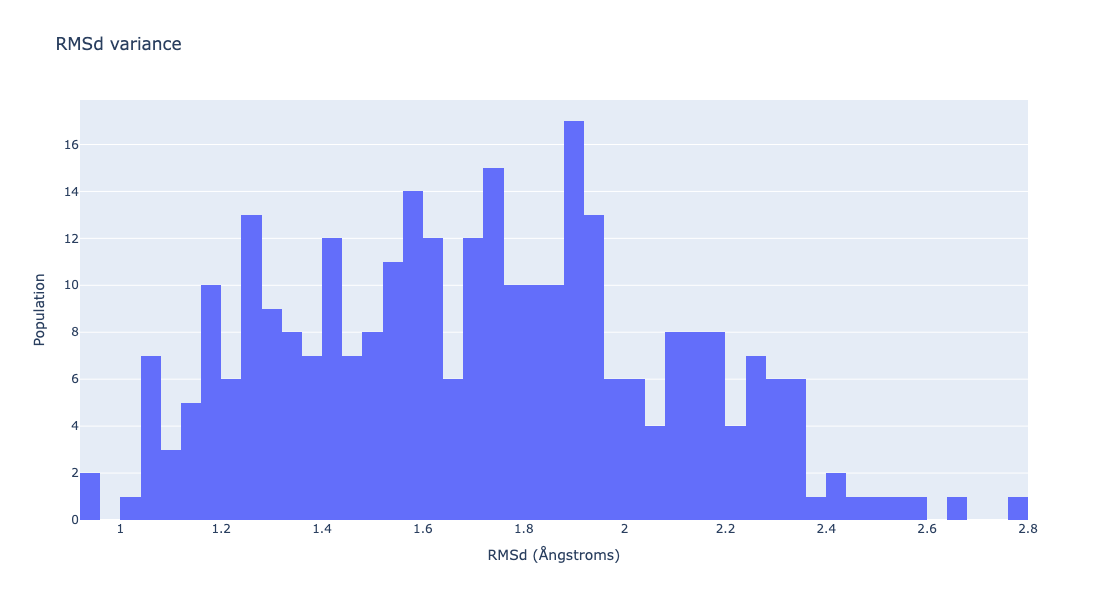

In [27]:
if 'google.colab' in sys.modules: use_colab_plotly()

df = pd.read_csv(concoord_rmsd, header = 0, delimiter='\s+')

# Create a histogram plot
fig = go.Figure(data=[go.Histogram(x=df['RMSD_00004'], xbins=dict(size=0.04), autobinx=False)])

# Update layout
fig.update_layout(title="RMSd variance",
                  xaxis_title="RMSd (Ångstroms)",
                  yaxis_title="Population",
                  height=600)

# Show the figure (renderer changes for colab and jupyter)
rend = 'colab' if 'google.colab' in sys.modules else ''
fig.show(renderer=rend)

if 'google.colab' in sys.modules: use_conda_env()

***
### Converting the generated ensemble (for visualization purposes)

***
**Building Blocks** used:
 - [cpptraj_convert](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_convert) from **biobb_analysis.ambertools.cpptraj_convert**
***

In [28]:
from biobb_analysis.ambertools.cpptraj_convert import cpptraj_convert

concoord_trr = pdbCode + "_disco_traj.trr"

prop = {
    'mask' : 'c-alpha',
    'format': 'trr'
}

cpptraj_convert(input_top_path=concoord_dist_pdb,
                input_traj_path=concoord_disco_pdb,
                output_cpptraj_path=concoord_trr,
                properties=prop)

2026-02-12 09:35:59,673 [MainThread  ] [INFO ]  Module: biobb_analysis.ambertools.cpptraj_convert Version: 5.2.0
2026-02-12 09:35:59,676 [MainThread  ] [INFO ]  Directory successfully created: /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_3a85cf23-c452-4c2e-84a9-5e9a748cbcf7
2026-02-12 09:35:59,679 [MainThread  ] [INFO ]  Copy to stage: 1ake_dist.pdb --> sandbox_3a85cf23-c452-4c2e-84a9-5e9a748cbcf7
2026-02-12 09:35:59,682 [MainThread  ] [INFO ]  Copy to stage: 1ake_disco_traj.pdb --> sandbox_3a85cf23-c452-4c2e-84a9-5e9a748cbcf7
2026-02-12 09:35:59,700 [MainThread  ] [INFO ]  Launching command (it may take a while): cpptraj -i /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_flexdyn/notebooks/sandbox_3a85cf23-c452-4c2e-84a9-5e9a748cbcf7/ea7cb7eb-5737-407b-83cd-8b6d4cd1b053instructions.in
2026-02-12 09:36:00,019 [MainThread  ] [INFO ]  Command 'cpptraj -i /Users/gbayarri/projects/BioBB/tutorials/biobb_wf_flexdyn/biobb_wf_fl

0

***
### Visualizing the generated ensemble (as a trajectory)
***

In [29]:
# Show trajectory
view = nglview.show_simpletraj(nglview.SimpletrajTrajectory(concoord_trr, prot_ca), gui=True)
view.center()
view.add_representation(repr_type='ball+stick', selection='all')
view._remote_call('setSize', target='Widget', args=['','600px'])
view

NGLWidget(max_frame=299)

<a id="prody"></a>
***
## PRODY

**ProDy** is a free and open-source Python package for **protein structural dynamics analysis**. It is designed as a flexible and responsive API suitable for **interactive usage** and **application development**.

* Structure analysis: **ProDy** has fast and flexible **PDB** and **DCD** file parsers, and powerful and customizable **atom selections** for contact identification, structure comparisons, and rapid implementation of new methods.


* Dynamics analysis: 
    - **Principal component analysis** can be performed for: 
        - heterogeneous X-ray structures (missing residues, mutations)
        - mixed structural datasets from Blast search
        - NMR models and MD snapshots (essential dynamics analysis)
        
    * **Normal mode analysis** can be performed using: 
        - Anisotropic network model (ANM)
        - Gaussian network model (GNM)
        - ANM/GNM with distance and property dependent force constants


References: <br>

**PRODY website**: http://prody.csb.pitt.edu/

**ProDy 2.0: Increased scale and scope after 10 years of protein dynamics modelling with Python.**<br>
*Bioinformatics, 2021, 37(20):3657-3659.*<br>
*Available at: https://doi.org/10.1093/bioinformatics/btab187*

**ProDy: Protein Dynamics Inferred from Theory and Experiments.**<br>
*Bioinformatics, 2011, 27(11):1575-1577.*<br>
*Available at: https://doi.org/10.1093/bioinformatics/btr168*

***
**Building Blocks** used:
 - [prody_anm](https://biobb-flexdyn.readthedocs.io/en/latest/flexdyn.html#module-prody.prody_anm) from **biobb_flexdyn.flexdyn.prody_anm**
***

In [ ]:
from biobb_flexdyn.flexdyn.prody_anm import prody_anm

prody_ensemble = pdbCode + "_prody_anm_traj.pdb"

prop = {
    'selection' : 'backbone',
    'num_structs' : num_frames,
    'rmsd' : 2.0
}

prody_anm(  input_pdb_path=monomer,
            output_pdb_path=prody_ensemble,
            properties=prop)


ModuleNotFoundError: No module named 'pkg_resources'

***
### RMSd distribution of the generated ensemble

***
**Building Blocks** used:
 - [cpptraj_rms](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_rms) from **biobb_analysis.ambertools.cpptraj_rms**
***

In [ ]:
from biobb_analysis.ambertools.cpptraj_rms import cpptraj_rms

prody_rmsd = pdbCode + "_prody_rmsd.dat"

prop = {
    'start': 1,
    'end': -1,
    'steps': 1,
    'mask': 'c-alpha',
    'reference': 'experimental'
}
cpptraj_rms(input_top_path=prody_ensemble,
            input_traj_path=prody_ensemble,
            output_cpptraj_path=prody_rmsd,
            input_exp_path= monomer,
            properties=prop)

***
### Visualizing the RMSd distribution
***

In [ ]:
if 'google.colab' in sys.modules: use_colab_plotly()

df = pd.read_csv(prody_rmsd, header = 0, delimiter='\s+')

# Create a histogram plot
fig = go.Figure(data=[go.Histogram(x=df['RMSD_00004'], xbins=dict(size=0.04), autobinx=False)])

# Update layout
fig.update_layout(title="RMSd variance",
                  xaxis_title="RMSd (Ångstroms)",
                  yaxis_title="Population",
                  height=600)

# Show the figure (renderer changes for colab and jupyter)
rend = 'colab' if 'google.colab' in sys.modules else ''
fig.show(renderer=rend)

if 'google.colab' in sys.modules: use_conda_env()

***
### Converting the generated ensemble (for visualization purposes)

***
**Building Blocks** used:
 - [cpptraj_convert](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_convert) from **biobb_analysis.ambertools.cpptraj_convert**
***

In [ ]:
from biobb_analysis.ambertools.cpptraj_convert import cpptraj_convert

prody_trr = pdbCode + "_prody_anm_traj.trr"

prop = {
    'mask' : 'c-alpha',
    'format': 'trr'
}

cpptraj_convert(input_top_path=prot_backbone,
                input_traj_path=prody_ensemble,
                output_cpptraj_path=prody_trr,
                properties=prop)

***
### Visualizing the generated ensemble (as a trajectory)
***

In [ ]:
# Show trajectory
view = nglview.show_simpletraj(nglview.SimpletrajTrajectory(prody_trr, prot_ca), gui=True)
view.center()
view.add_representation(repr_type='ball+stick', selection='all')
view._remote_call('setSize', target='Widget', args=['','600px'])
view

<a id="flexserv"></a>
***
## FLEXSERV

Despite recent advances in **experimental techniques**, the study of **molecular flexibility** is mostly a task for **theoretical methods**. The most powerful of them is **atomistic molecular dynamics** (MD), a rigorous method with solid physical foundations, which provides accurate representations of **protein flexibility** under **physiological-like environments**. Unfortunately, despite its power, MD is a **complex technique**, **computationally expensive** and their use requires a certain **degree of expertise**. The alternative to **atomistic MD** is the use of **coarse-grained** methods coupled to **simple potentials**. By using these techniques we assume a **lost of atomic detail** to gain formal and **computational simplicity** in the representation of near-native state **flexibility** of proteins. Unfortunately, despite its power, the practical use of coarse-grained methods is still limited, due mostly to the lack of **standardized protocols** for analysis and the existence of a myriad of different algorithms distributed in different websites.

**FlexServ** webserver and associated **BioBB module** integrate three **coarse-grained** algorithms for the representation of **protein flexibility**: 

i) **Brownian dynamics** (BD) <br>
ii) **Discrete dynamics** (DMD)<br>
iii) **Normal mode analysis** (NMA) based on different types of elastic networks <br>

This next cells of this tutorial show how to extract **molecular flexibility** (conformational ensemble) from a single, static structure **downloaded** from the **PDB database**, generating its **coarse-grained**, reduced representation ($C_{\alpha}$) and running the previously mentioned **coarse-grained algorithms**.

References: <br>

**FLEXSERV website**: https://mmb.irbbarcelona.org/FlexServ/

**FlexServ: an integrated tool for the analysis of protein flexibility.**<br>
*Bioinformatics, Volume 25, Issue 13, 2009, Pages 1709–1710,.*<br>
*Available at: https://doi.org/10.1093/bioinformatics/btp304*

***
**Building Blocks** used:
 - [bd_run](https://biobb-flexserv.readthedocs.io/en/latest/flexserv.html#module-flexserv.bd_run) from **biobb_flexserv.flexserv.bd_run**
 - [dmd_run](https://biobb-flexserv.readthedocs.io/en/latest/flexserv.html#module-flexserv.dmd_run) from **biobb_flexserv.flexserv.dmd_run**
 - [nma_run](https://biobb-flexserv.readthedocs.io/en/latest/flexserv.html#module-flexserv.nma_run) from **biobb_flexserv.flexserv.nma_run**
***

<a id="bd"></a>
***
## Brownian Dynamics (BD)

The **Brownian Dynamics** (BD) method introduces the protein in an **stochastic bath** that keeps the **temperature constant** and modulates the otherwise extreme oscillations of the residues. This bath is simulated with two terms accounting for a **velocity-dependent friction** and **stochastic forces** due to the **solvent environment**.
**Velocity Verlet** algorithm is used to solve the **stochastic differential equation** (equation of motion) for **alpha-carbons** ($C\alpha$). The **equation of motion** is integrated using **Verlet’s algorithm**
The **potential energy** used to compute **forces** in the **equation of motion** assumes a **coarse-grained representation of the protein** ($C\alpha$-only) and a **quasi-harmonic representation** of the **interactions** (similar to that suggested by [Kovacs et al. 2004](https://doi.org/10.1002/prot.20151)).

The initial condition is a **native structure** (or MD-averaged conformation) that is supposed to be in the **minimal energy state**, from which the **relative vectors** are computed. Brownian Dynamics (BD) **simulation time scales** were equivalent to those considered in **Molecular Dynamics** (MD).

Reference: <br>
**Exploring the Suitability of Coarse-Grained Techniques for the Representation of Protein Dynamics.**<br>
*Biophysical Journal, Volume 95, Issue 5, 1 September 2008, Pages 2127-2138*<br>
*Available at: https://doi.org/10.1529/biophysj.107.119115*

***

In [ ]:
# Running Brownian Dynamics (BD)
# Import module
from biobb_flexserv.flexserv.bd_run import bd_run

# Create properties dict and inputs/outputs

bd_log = pdbCode + '_flexserv_bd_ensemble.log'
bd_crd = pdbCode + '_flexserv_bd_ensemble.mdcrd'

wfreq = 100
time = num_frames * wfreq

prop = {
    'time': time,
    'wfreq': wfreq
}

bd_run( 
     input_pdb_path=prot_ca,
     output_crd_path=bd_crd,
     output_log_path=bd_log,
     properties=prop
)

***
### RMSd distribution of the generated ensemble

***
**Building Blocks** used:
 - [cpptraj_rms](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_rms) from **biobb_analysis.ambertools.cpptraj_rms**
***

In [ ]:
from biobb_analysis.ambertools.cpptraj_rms import cpptraj_rms

flexserv_bd_rmsd = pdbCode + "_flexserv_bd_rmsd.dat"

prop = {
    'start': 1,
    'end': -1,
    'steps': 1,
    'mask': 'c-alpha',
    'reference': 'experimental'
}
cpptraj_rms(input_top_path=prot_ca,
            input_traj_path=bd_crd,
            output_cpptraj_path=flexserv_bd_rmsd,
            input_exp_path=monomer,
            properties=prop)

***
### Visualizing the RMSd distribution
***

In [ ]:
if 'google.colab' in sys.modules: use_colab_plotly()

df = pd.read_csv(flexserv_bd_rmsd, header = 0, delimiter='\s+')

# Create a histogram plot
fig = go.Figure(data=[go.Histogram(x=df['RMSD_00004'], xbins=dict(size=0.04), autobinx=False)])

# Update layout
fig.update_layout(title="RMSd variance",
                  xaxis_title="RMSd (Ångstroms)",
                  yaxis_title="Population",
                  height=600)

# Show the figure (renderer changes for colab and jupyter)
rend = 'colab' if 'google.colab' in sys.modules else ''
fig.show(renderer=rend)

if 'google.colab' in sys.modules: use_conda_env()

***
### Fitting and converting the generated ensemble (for visualization purposes)

***
**Building Blocks** used:
 - [cpptraj_rms](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_rms) from **biobb_analysis.ambertools.cpptraj_rms**
***

In [ ]:
from biobb_analysis.ambertools.cpptraj_rms import cpptraj_rms

flexserv_bd_rmsd = pdbCode + "_flexserv_bd_rmsd.dat" 
flexserv_bd_traj_fitted = pdbCode + "_flexserv_bd_traj_fitted.trr"

prop = {
    'start': 1,
    'end': -1,
    'steps': 1,
    'mask': 'c-alpha',
    'reference': 'experimental'
}
cpptraj_rms(input_top_path=prot_ca,
            input_traj_path=bd_crd,
            output_cpptraj_path=flexserv_bd_rmsd,
            output_traj_path=flexserv_bd_traj_fitted,
            input_exp_path= monomer,
            properties=prop)

***
### Visualizing the generated ensemble (as a trajectory)
***

In [ ]:
# Show trajectory
view = nglview.show_simpletraj(nglview.SimpletrajTrajectory(flexserv_bd_traj_fitted, prot_ca), gui=True)
view.add_representation(repr_type='ball+stick', selection='all')
view.center()
view._remote_call('setSize', target='Widget', args=['','600px'])
view

<a id="dmd"></a>
***
## Discrete Molecular Dynamics (DMD)

With the **Discrete Molecular Dynamics** (DMD) method, the proteins are modelled as a system of beads ($C\alpha$ atoms) interacting through a **discontinuous potential** (square wells in the used tool). Outside the discontinuities, **potentials** are considered constant, thereby implying a **ballistic regime** for the particles (**constant potential, constant velocity**) in all conditions, except at such time as when the particles reach a **potential discontinuity** (this is called “an **event**” or “a **collision**”). At this time, the **velocities** of the colliding particles are modified by imposing **conservation of the linear momentum**, **angular momentum**, and **total energy**. Since the particles were constrained to move within a configurational space where the **potential energy** is constant (**infinite square wells**), the **kinetic energy** remains unchanged and therefore all collisions are assumed to be **elastic**.

**DMD** has a major advantage over techniques like **MD** because, as it does not require the **integration of the equations of motion** at fixed **time steps**, the calculation progresses **from event to event**. In practice, the time between events decreases with **temperature** and **density** and depends on the **number of particles
N**. The **equation of motion**, corresponding to **constant velocity**, is solved analytically.

As the **integration of Newton’s equations** is no longer the rate limiting step, calculations can be extended for very **long simulation** periods and **large systems**, provided an efficient algorithm for **predicting collisions** is used.

The **collision between particles** i and j is associated with a **transfer of linear momentum** in the direction of the vector $\vec{r_{ij}}$. To calculate the **change in velocities**, the **velocity** of each **particle** is projected in the **direction of the vector** $\vec{r_{ij}}$ so that the **conservation equations** become one-dimensional along the **interatomic coordinate**. 

***

In [ ]:
# Running Discrete Molecular Dynamics (DMD)
# Import module
from biobb_flexserv.flexserv.dmd_run import dmd_run

# Create properties dict and inputs/outputs

dmd_log = pdbCode + '_flexserv_dmd_ensemble.log'
dmd_crd = pdbCode + '_flexserv_dmd_ensemble.mdcrd'

prop = {
    'frames': num_frames
}
dmd_run( 
     input_pdb_path=prot_ca,
     output_crd_path=dmd_crd,
     output_log_path=dmd_log,
     properties=prop
)

***
### RMSd distribution of the generated ensemble

***
**Building Blocks** used:
 - [cpptraj_rms](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_rms) from **biobb_analysis.ambertools.cpptraj_rms**
***

In [ ]:
from biobb_analysis.ambertools.cpptraj_rms import cpptraj_rms

flexserv_dmd_rmsd = pdbCode + "_flexserv_dmd_rmsd.dat"

prop = {
    'start': 1,
    'end': -1,
    'steps': 1,
    'mask': 'c-alpha',
    'reference': 'experimental'
}

cpptraj_rms(input_top_path=prot_ca,
            input_traj_path=dmd_crd,
            output_cpptraj_path=flexserv_dmd_rmsd,
            input_exp_path= monomer,
            properties=prop)

***
### Visualizing the RMSd distribution
***

In [ ]:
if 'google.colab' in sys.modules: use_colab_plotly()

df = pd.read_csv(flexserv_dmd_rmsd, header = 0, delimiter='\s+')

# Create a histogram plot
fig = go.Figure(data=[go.Histogram(x=df['RMSD_00004'], xbins=dict(size=0.04), autobinx=False)])

# Update layout
fig.update_layout(title="RMSd variance",
                  xaxis_title="RMSd (Ångstroms)",
                  yaxis_title="Population",
                  height=600)

# Show the figure (renderer changes for colab and jupyter)
rend = 'colab' if 'google.colab' in sys.modules else ''
fig.show(renderer=rend)

if 'google.colab' in sys.modules: use_conda_env()

***
### Fitting and converting the generated ensemble (for visualization purposes)

***
**Building Blocks** used:
 - [cpptraj_rms](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_rms) from **biobb_analysis.ambertools.cpptraj_rms**
***

In [ ]:
from biobb_analysis.ambertools.cpptraj_rms import cpptraj_rms

flexserv_dmd_rmsd = pdbCode + "_flexserv_dmd_rmsd.dat"
flexserv_dmd_traj_fitted = pdbCode + "_flexserv_dmd_traj_fitted.trr"

prop = {
    'start': 1,
    'end': -1,
    'steps': 1,
    'mask': 'c-alpha',
    'reference': 'experimental'
}

cpptraj_rms(input_top_path=prot_ca,
            input_traj_path=dmd_crd,
            output_cpptraj_path=flexserv_dmd_rmsd,
            output_traj_path=flexserv_dmd_traj_fitted,
            input_exp_path= monomer,
            properties=prop)

***
### Visualizing the generated ensemble (as a trajectory)
***

In [ ]:
# Show trajectory
view = nglview.show_simpletraj(nglview.SimpletrajTrajectory(flexserv_dmd_traj_fitted, prot_ca), gui=True)
view.add_representation(repr_type='ball+stick', selection='all')
view.center()
view._remote_call('setSize', target='Widget', args=['','600px'])
view

<a id="nma"></a>
***
## Normal Mode Analysis (NMA)

**Normal Mode Analysis** (NMA) can be defined as the **multidimensional** treatment of **coupled oscillators** from the analysis of **force-derivatives** in **equilibrium conformations**. This methodology assumes that the **displacement** of an **atom** from its **equilibrium position** is small and that the **potential energy** in the vicinity of the **equilibrium position** can be approximated as a **sum of terms** that are **quadratic** in the **atomic displacements**. In its purest form, it uses the same **all-atom force field** from a **MD simulation**, implying a prior **in vacuo minimization** ([Go and Scheraga 1976](https://pubs.acs.org/cgi-bin/abstract.cgi/mamobx/1976/9/i04/f-pdf/f_ma60052a001.pdf?sessid=6006l3); [Brooks III, Karplus et al. 1987](https://adsabs.harvard.edu/abs/1990PhT....43b.120B)). 

[Tirion (1996)](https://link.aps.org/doi/10.1103/PhysRevLett.77.1905) proposed a **simplified model** where the **interaction** between two atoms was described by **Hookean pairwise potential** where the distances are taken to be at the minimum, avoiding the minimization (referred as **Elastic Network Model** -ENM-). This idea being further extended to use **coarse-grained** ($C\alpha$) protein representation by several research groups, as in the **Gaussian Network Model** -GNM- ([Bahar et al. 1997](https://linkinghub.elsevier.com/retrieve/pii/S1359027897000242); [Haliloglu et al. 1997](https://link.aps.org/doi/10.1103/PhysRevLett.79.3090)). The **GNM model** was later extended to a 3-D, vectorial **Anisotropic Network Model** -ANM-, which is the formalism implemented in the following cell ([Atilgan et al. 2001](https://www.biophysj.org/cgi/content/abstract/80/1/505)). Through the **diagonalization** of the **hessian matrix**, the **ANM** provides **eigenvalues** and **eigenvectors** that not only describe the **frequencies** and **shapes** of the **normal modes**, but also their **directions**.

Once **NMA** is performed and the set of **eigenvectors/eigenvalues** is determined, ***Cartesian pseudo-trajectories*** at **physiologic temperature** can be obtained by activating **normal mode deformations** using a **Metropolis Monte Carlo algorithm**. The **displacements** obtained by such algorithm can then be projected to the **Cartesian space** to generate the ***pseudo-trajectories***.

***

In [ ]:
# Running Normal Mode Analysis (NMA)
# Import module
from biobb_flexserv.flexserv.nma_run import nma_run

# uncomment if executing in google colab
# %env CONDA_PREFIX=/usr/local

# Create properties dict and inputs/outputs

nma_log = pdbCode + '_flexserv_nma_ensemble.log'
nma_crd = pdbCode + '_flexserv_nma_ensemble.mdcrd'

prop = {
    'frames' : num_frames
}

nma_run( 
     input_pdb_path=prot_ca,
     output_crd_path=nma_crd,
     output_log_path=nma_log,
     properties=prop
)

***
### RMSd distribution of the generated ensemble

***
**Building Blocks** used:
 - [cpptraj_rms](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_rms) from **biobb_analysis.ambertools.cpptraj_rms**
***

In [ ]:
from biobb_analysis.ambertools.cpptraj_rms import cpptraj_rms

flexserv_nma_rmsd = pdbCode + "_flexserv_nma_rmsd.dat"

prop = {
    'start': 1,
    'end': -1,
    'steps': 1,
    'mask': 'c-alpha',
    'reference': 'experimental'
}

cpptraj_rms(input_top_path=prot_ca,
            input_traj_path=nma_crd,
            output_cpptraj_path=flexserv_nma_rmsd,
            input_exp_path= monomer,
            properties=prop)

***
### Visualizing the RMSd distribution
***

In [ ]:
if 'google.colab' in sys.modules: use_colab_plotly()

df = pd.read_csv(flexserv_nma_rmsd, header = 0, delimiter='\s+')

# Create a histogram plot
fig = go.Figure(data=[go.Histogram(x=df['RMSD_00004'], xbins=dict(size=0.04), autobinx=False)])

# Update layout
fig.update_layout(title="RMSd variance",
                  xaxis_title="RMSd (Ångstroms)",
                  yaxis_title="Population",
                  height=600)

# Show the figure (renderer changes for colab and jupyter)
rend = 'colab' if 'google.colab' in sys.modules else ''
fig.show(renderer=rend)

if 'google.colab' in sys.modules: use_conda_env()

***
### Converting the generated ensemble (for visualization purposes)

***
**Building Blocks** used:
 - [cpptraj_convert](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_convert) from **biobb_analysis.ambertools.cpptraj_convert**
***

In [ ]:
from biobb_analysis.ambertools.cpptraj_convert import cpptraj_convert

nma_trr = pdbCode + '_flexserv_nma_ensemble.trr'

prop = {
    'mask' : 'c-alpha',
    'format': 'trr'
}

cpptraj_convert(input_top_path=prot_ca,
                input_traj_path=nma_crd,
                output_cpptraj_path=nma_trr,
                properties=prop)

***
### Visualizing the generated ensemble (as a trajectory)
***

In [ ]:
# Show trajectory
view = nglview.show_simpletraj(nglview.SimpletrajTrajectory(nma_trr, prot_ca), gui=True)
view.add_representation(repr_type='ball+stick', selection='all')
view.center()
view._remote_call('setSize', target='Widget', args=['','600px'])
view

<a id="nolb"></a>
***
## NOLB

**NOn-Linear rigid Block NMA approach** (NOLB) is a conceptually simple and **computationally efficient** method for **non-linear normal mode analysis**.

The key observation of the method is that the **angular velocity** of a **residue** can be interpreted as the result of an **implicit force**, such that the **motion of the residue** can be considered as a **pure rotation** about a **certain center**.

References: <br>

**NOLB website**: https://team.inria.fr/nano-d/software/nolb-normal-modes/

**NOLB : Non-linear rigid block normal mode analysis method.**<br>
*Journal of Chemical Theory and Computation, 2017, 13 (5), pp.2123-2134.*<br>
*Available at: https://doi.org/10.1021/acs.jctc.7b00197*

***
**Building Blocks** used:
 - [nolb](https://biobb-flexdyn.readthedocs.io/en/latest/flexdyn.html#module-nolb.nolb) from **biobb_flexdyn.nolb.nolb**
***

In [ ]:
from biobb_flexdyn.flexdyn.nolb_nma import nolb_nma

nolb_pdb = pdbCode + '_nolb_ensemble.pdb'

prop = {
    'num_structs' : num_frames,
    'rmsd' : 4
}

nolb_nma(   input_pdb_path=prot_ca,
        output_pdb_path=nolb_pdb,
        properties=prop)

***
### RMSd distribution of the generated ensemble

***
**Building Blocks** used:
 - [cpptraj_rms](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_rms) from **biobb_analysis.ambertools.cpptraj_rms**
***

In [ ]:
from biobb_analysis.ambertools.cpptraj_rms import cpptraj_rms

nolb_rmsd = pdbCode + "_nolb_rmsd.dat"

prop = {
    'start': 1,
    'end': -1,
    'steps': 1,
    'mask': 'c-alpha',
    'reference': 'experimental'
}

cpptraj_rms(input_top_path=prot_ca,
            input_traj_path=nolb_pdb,
            output_cpptraj_path=nolb_rmsd,
            input_exp_path= monomer,
            properties=prop)

***
### Visualizing the RMSd distribution
***

In [ ]:
if 'google.colab' in sys.modules: use_colab_plotly()

df = pd.read_csv(nolb_rmsd, header = 0, delimiter='\s+')

# Create a histogram plot
fig = go.Figure(data=[go.Histogram(x=df['RMSD_00004'], xbins=dict(size=0.04), autobinx=False)])

# Update layout
fig.update_layout(title="RMSd variance",
                  xaxis_title="RMSd (Ångstroms)",
                  yaxis_title="Population",
                  height=600)

# Show the figure (renderer changes for colab and jupyter)
rend = 'colab' if 'google.colab' in sys.modules else ''
fig.show(renderer=rend)

if 'google.colab' in sys.modules: use_conda_env()

***
### Converting the generated ensemble (for visualization purposes)

***
**Building Blocks** used:
 - [cpptraj_convert](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_convert) from **biobb_analysis.ambertools.cpptraj_convert**
***

In [ ]:
from biobb_analysis.ambertools.cpptraj_convert import cpptraj_convert

nolb_trr = pdbCode + '_nolb_ensemble.trr'

prop = {
    'mask' : 'c-alpha',
    'format': 'trr'
}

cpptraj_convert(input_top_path=prot_ca,
                input_traj_path=nolb_pdb,
                output_cpptraj_path=nolb_trr,
                properties=prop)

***
### Visualizing the generated ensemble (as a trajectory)
***

In [ ]:
# Show trajectory
view = nglview.show_simpletraj(nglview.SimpletrajTrajectory(nolb_trr, prot_ca), gui=True)
view.clear_representations()
view.add_representation(repr_type='ball+stick', selection='all')
view.center()
view._remote_call('setSize', target='Widget', args=['','600px'])
view

<a id="imod"></a>
***
## iMOD

**iMOD** is an versatile toolkit to perform **Normal Mode Analysis (NMA)** in **internal coordinates (IC)** on both protein and nucleic acid atomic structures. **Vibrational analysis**, **motion animations**, **morphing trajectories** and **Monte-Carlo simulations** can be easily carried out at different scales of **resolution** using this toolkit. 

References: <br>

**iMOD website**: https://chaconlab.org/multiscale-simulations/imod <br>
**iMOD webserver**: https://imods.iqfr.csic.es/

**iMod: multipurpose normal mode analysis in internal coordinates.**<br>
*Bioinformatics, 2011, 27 (20): 2843-2850.*<br>
*Available at: https://doi.org/10.1093/bioinformatics/btr497*

**iMODS: Internal coordinates normal mode analysis server.**<br>
*Nucleic acids research, 2014, 42:W271-6.*<br>
*Available at: https://doi.org/10.1093/bioinformatics/btr497*

***
**Building Blocks** used:
 - [imod_imode](https://biobb-flexdyn.readthedocs.io/en/latest/flexdyn.html#module-flexdyn.imod_imode) from **biobb_flexdyn.flexdyn.imod_imode**
 - [imod_imc](https://biobb-flexdyn.readthedocs.io/en/latest/flexdyn.html#module-flexdyn.imod_imc) from **biobb_flexdyn.flexdyn.imod_imc**
***

In [ ]:
from biobb_flexdyn.flexdyn.imod_imode import imod_imode

imode_evecs = pdbCode + '_imode_evecs.dat'

prop = {
    'cg' : 2
}

imod_imode(  input_pdb_path=monomer,
        output_dat_path=imode_evecs,
        properties=prop)

In [ ]:
from biobb_flexdyn.flexdyn.imod_imc import imod_imc

imc_pdb = pdbCode + '_imc.pdb'

prop = {
    'num_structs': num_frames,
    'num_modes': 10,
    'amplitude': 6.0
}

imod_imc(   input_pdb_path=monomer,
            input_dat_path=imode_evecs,
            output_traj_path=imc_pdb,
            properties=prop)

***
### RMSd distribution of the generated ensemble

***
**Building Blocks** used:
 - [cpptraj_rms](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_rms) from **biobb_analysis.ambertools.cpptraj_rms**
***

In [ ]:
from biobb_analysis.ambertools.cpptraj_rms import cpptraj_rms

imods_rmsd = pdbCode + "_imods_rmsd.dat"

prop = {
    'start': 1,
    'end': -1,
    'steps': 1,
    'mask': 'c-alpha',
    'reference': 'experimental'
}

cpptraj_rms(input_top_path=imc_pdb,
            input_traj_path=imc_pdb,
            output_cpptraj_path=imods_rmsd,
            input_exp_path= monomer,
            properties=prop)

***
### Visualizing the RMSd distribution
***

In [ ]:
if 'google.colab' in sys.modules: use_colab_plotly()

df = pd.read_csv(imods_rmsd, header = 0, delimiter='\s+')

# Create a histogram plot
fig = go.Figure(data=[go.Histogram(x=df['RMSD_00004'], xbins=dict(size=0.04), autobinx=False)])

# Update layout
fig.update_layout(title="RMSd variance",
                  xaxis_title="RMSd (Ångstroms)",
                  yaxis_title="Population",
                  height=600)

# Show the figure (renderer changes for colab and jupyter)
rend = 'colab' if 'google.colab' in sys.modules else ''
fig.show(renderer=rend)

if 'google.colab' in sys.modules: use_conda_env()

***
### Converting the generated ensemble (for visualization purposes)

***
**Building Blocks** used:
 - [cpptraj_convert](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_convert) from **biobb_analysis.ambertools.cpptraj_convert**
***

In [ ]:
from biobb_analysis.ambertools.cpptraj_convert import cpptraj_convert

imods_trr = pdbCode + '_imods_ensemble.trr'

prop = {
    'mask' : 'c-alpha',
    'format': 'trr'
}

cpptraj_convert(input_top_path=imc_pdb,
                input_traj_path=imc_pdb,
                output_cpptraj_path=imods_trr,
                properties=prop)

***
### Visualizing the generated ensemble (as a trajectory)
***

In [ ]:
# Show trajectory
view = nglview.show_simpletraj(nglview.SimpletrajTrajectory(imods_trr, prot_ca), gui=True)
view.clear_representations()
view.add_representation(repr_type='ball+stick', selection='all')
view.center()
view._remote_call('setSize', target='Widget', args=['','600px'])
view

<a id="metatraj"></a>
***
## Meta-Trajectory & Clustering

The generated **conformational ensembles** using the collection of **computational tools** can be used together  assembling a **meta-trajectory**. This **meta-trajectory** can then be **clusterized** to remove redundancies included in the structures. A meta-trajectory with results from different **computational methods** as different as the ones used in this **workflow** (Vibrational analysis, Coarse-grained molecular simulations, Atomistic intra-molecular interactions) can be helpful to enrich the **conformational sampling** and broadly populate the **conformational landscape**.    

The next cells are generating a **meta-trajectory** from the set of **generated conformational ensembles**. Note that the ensembles used in this process need to be coherent on the **atomistic resolution** (they need to have the same **number of atoms**). As an example, if using **C-alpha only** structures, they all need to be **C-alpha only**. **Ensembles** used for the **meta-trajectory** creation can be easily modified in the next cell, commenting the lines of the unwanted files.  

***

### Building the meta-trajectory

***
**Building Blocks** used:
 - [trjcat](https://biobb-gromacs.readthedocs.io/en/latest/gromacs.html#module-gromacs.trjcat) from **biobb_gromacs.gromacs.trjcat**
***

In [ ]:
traj_zip = pdbCode + "_concat_traj.zip"

with zipfile.ZipFile(traj_zip, 'w') as myzip:
    myzip.write(concoord_trr)
    myzip.write(prody_trr)
    myzip.write(imods_trr)
    #myzip.write(flexserv_bd_traj_fitted)
    myzip.write(flexserv_dmd_traj_fitted)    
    myzip.write(nma_trr)


In [ ]:
from biobb_gromacs.gromacs.trjcat import trjcat

concat_trr = pdbCode + "_concat_traj.trr"

trjcat(input_trj_zip_path=traj_zip,
       output_trj_path=concat_trr)

***
### Clustering the meta-trajectory

***
**Building Blocks** used:
 - [make_ndx](https://biobb-gromacs.readthedocs.io/en/latest/gromacs.html#module-gromacs.make_ndx) from **biobb_gromacs.gromacs.make_ndx**
 - [gmx_cluster](https://biobb-analysis.readthedocs.io/en/latest/gromacs.html#module-gromacs.gmx_cluster) from **biobb_analysis.gromacs.gmx_cluster** 
***

In [ ]:
from biobb_gromacs.gromacs.make_ndx import make_ndx

gmx_index_file = pdbCode + "_gmx_ndx.ndx"

prop = { 'selection': 3 }

make_ndx(input_structure_path=prot_ca,
         output_ndx_path=gmx_index_file,
         properties=prop)

In [ ]:
from biobb_analysis.gromacs.gmx_cluster import gmx_cluster

cluster_concat_pdb = pdbCode + "_concat_cluster.pdb"

prop = {
    'fit_selection': 'System',
    'output_selection': 'System',
    'method': 'linkage',
    'cutoff': 0.12 # (0.12 nm = 1.2 Ångstroms) 
    #'cutoff': 0.15 # (0.15 nm = 1.5 Ångstroms) 
}

gmx_cluster(input_structure_path=prot_ca,
            input_traj_path=concat_trr,
            input_index_path=gmx_index_file,
            output_pdb_path=cluster_concat_pdb,
            properties=prop)

***
### Visualizing the generated ensemble (cluster)
***

In [ ]:
# Show protein
view = nglview.show_structure_file(cluster_concat_pdb, default_representation=False)
view.add_representation(repr_type='tube', selection='all', color='modelindex')
view._remote_call('setSize', target='Widget', args=['','600px'])
view

<a id="flexibility"></a>
***
## Macromolecular Flexibility Analyses

Once the final **ensemble** (meta-trajectory) is generated, it can be used to extract **flexibility/dynamic** patterns. A large variety of methods to **characterize flexibility** exist. In this **workflow**, the global movements of the structure will be analysed using **Essential Dynamics** (ED) routines (Amadei, et al., 1993), based in the well-known **Principal Components Analyisis** (PCA) statistical method.

Other advanced tools allow the determination of **dynamic domains** and **hinge points** using a variety of techniques: i) exploration of the B-factor landscape after fitting with the gaussian RMSd method, ii) analysis of the force-constant profile (Sacquin-Mora and Lavery, 2006) and iii) clustering by inter-residue correlation (Navizet, et al., 2004). 

In all the analysis the resulting data is presented as a **json-formatted files**, and **2D plots** are generated when appropriate.

<a id="pca"></a>
***
### Principal Component Analysis

**Principal Component Analysis** is extensively used to characterize the most important **deformation modes** obtained by **diagonalization** of the **trajectory covariance matrix**. The **eigenvectors** represent the nature of the **essential deformation patterns**, while the **eigenvalues** can be transformed into the **frequencies** or **stiffness** of these movements. **Essential deformation movements** are ranked by importance and can be visualized and processed to obtain information (see Meyer, et al., 2006; Rueda, et al., 2007a for a detailed explanation), such as **B-Factor profiles**, the **collectivity index** (a measure of the collective nature of protein motions, Brüschweiler, 1995), the **variance profile**, the **dimensionality** (the number of movements defining a percentage of variance), or the **size of the essential space** (the number of modes with eigenvalues > 1 Å²). 

From the many available tools able to compute **PCA analysis** with **macromolecular data** (atomistic 3D coordinates), the **workflow** is using the **[pcasuite package](https://mmb.irbbarcelona.org/software/pcasuite/)**, integrated in the **BioBB library**. 


***
### Fitting and converting the generated ensemble (meta-trajectory) (for visualization purposes)

***
**Building Blocks** used:
 - [cpptraj_rms](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_rms) from **biobb_analysis.ambertools.cpptraj_rms**
***

In [ ]:
from biobb_analysis.ambertools.cpptraj_rms import cpptraj_rms

meta_traj_rmsd = pdbCode + "_meta_traj_rmsd.dat" 
meta_traj_fitted = pdbCode + "_meta_traj_fitted.crd"

prop = {
    'start': 1,
    'end': -1,
    'steps': 1,
    'mask': 'c-alpha',
    'reference': 'experimental'
}
cpptraj_rms(input_top_path=prot_ca,
            input_traj_path=cluster_concat_pdb,
            output_cpptraj_path=meta_traj_rmsd,
            output_traj_path=meta_traj_fitted,
            input_exp_path= prot_ca,
            properties=prop)

***
### Computing the Principal Component Analysis (PCA)
***

**Building Block** used:

 - [pcz_zip](https://biobb-flexserv.readthedocs.io/en/latest/pcasuite.html#module-pcasuite.pcz_zip) from **biobb_flexserv.pcasuite.pcz_zip** 


In [ ]:
from biobb_flexserv.pcasuite.pcz_zip import pcz_zip

concat_pcz = pdbCode + '_concat_ensemble.pcz'
concat_pcz_gaussian = pdbCode + '_concat_ensemble_gaussian.pcz'

# Classical RMSd fitting
prop = {
    'variance': 90,
    'neigenv' : 10
}

pcz_zip( input_pdb_path=prot_ca,
        input_crd_path=meta_traj_fitted,
        output_pcz_path=concat_pcz,
        properties=prop)

# Gaussian (weighted) RMSd fitting
prop = {
    'variance': 90,
    'neigenv' : 10,
    'gauss_rmsd' : True
}

pcz_zip( input_pdb_path=prot_ca,
        input_crd_path=meta_traj_fitted,
        output_pcz_path=concat_pcz_gaussian,
        properties=prop)

***
### Analysing the PCA report
***

The result of the **PCA analysis** is the generation of a set of **eigenvectors** (the modes or the principal components), which describe the nature of the **deformation movements** of the protein and a set of **eigenvalues**, which indicate the **stiffness** associated to every **mode**. 

The **eigenvectors** appear ranked after a **principal component analysis**, the first one is that explaining the **largest part of the variance** (as indicated by the associated **eigenvalue**). Since the **eigenvectors** represent a full-basis set, the **original Cartesian trajectory** can be always **projected** into the **eigenvectors space**, without lost of information. Furthermore, if a restricted set of **eigenvectors** is used, information is lost, but the level of error introduced in the simplification is always on user-control by considering the **annihilated variance** (the residual value between the **variance explained** by the set of the **eigenvectors** considered and the **total variance**).

**Essential information** extracted from the **PCA analysis** can be retrieved from a **pcz file** with the **pcz_info building block**. Information such as **eigenvalues, number of eigenvectors, total variance, explained variance, quality or dimensionality** are included in the **PCA report**.  


**Building Block** used:
 
 - [pcz_info](https://biobb-flexserv.readthedocs.io/en/latest/pcasuite.html#module-pcasuite.pcz_info) from **biobb_flexserv.pcasuite.pcz_info** 

In [ ]:
from biobb_flexserv.pcasuite.pcz_info import pcz_info

pcz_report = pdbCode + "_pcz_report.json"

pcz_info( 
    input_pcz_path=concat_pcz,
    output_json_path=pcz_report
)

***
### Plotting Variance Profile
***

The following plot shows the **total variance** of the trajectory and how it is **distributed** along the different **eigenvectors**. **Variance** appears in Å² and **eigenvectors** are shown according to **eigenvalues** descending order, the first one being the **most important** one and the last that with the **lower contribution to variance**. This graph indicates the **size of the flexibility space** (the higher the variance, the higher the flexibility) and how it is distributed in different **modes**.

In [ ]:
with open(pcz_report, 'r') as f:
  pcz_info = json.load(f)
print(json.dumps(pcz_info, indent=2))

In [ ]:
if 'google.colab' in sys.modules: use_colab_plotly()

# Plotting Variance Profile
y = np.array(pcz_info['Eigen_Values'])
x = list(range(1,len(y)+1))

# Create a scatter plot
fig = go.Figure(data=[go.Scatter(x=x, y=y)])

# Update layout
fig.update_layout(title="Variance Profile",
                  xaxis_title="Principal Component",
                  yaxis_title="Variance",
                  height=600)

# Show the figure (renderer changes for colab and jupyter)
rend = 'colab' if 'google.colab' in sys.modules else ''
fig.show(renderer=rend)

if 'google.colab' in sys.modules: use_conda_env()

***
### Plotting Dimensionality/quality profile
***

The following plot shows the **percentage** of **explained variance** for a given number of **eigenvectors** (quality) and the **dimensionality** of the sampled space. This graph indicates the **complexity of the flexibility space**, i.e. how many **modes** are necessary to explain the **entire flexibility** of the protein. 

Note that this plot and the previous one provide **physically-different** information and that proteins might display a very **complex pattern of flexibility** (leading to **large dimensionality**) and at the same time be **quite rigid** (**low variance**), or have a **large variance** which can be fully explained by a very **small number of modes**.

In [ ]:
if 'google.colab' in sys.modules: use_colab_plotly()

# Plotting Dimensionality/quality profile
y = np.array(pcz_info['Eigen_Values_dimensionality_vs_total'])
x = list(range(1,len(y)+1))

# Create a scatter plot
fig = go.Figure(data=[go.Scatter(x=x, y=y)])

# Update layout
fig.update_layout(title="Dimensionality/Quality profile",
                  xaxis_title="Principal Component",
                  yaxis_title="Accumulated Quality (%)",
                  height=600)

# Show the figure (renderer changes for colab and jupyter)
rend = 'colab' if 'google.colab' in sys.modules else ''
fig.show(renderer=rend)

if 'google.colab' in sys.modules: use_conda_env()

***
### PCA Eigenvectors & Eigenvalues 
***

As stated above, the generated set of **eigenvectors** (the modes or the principal components) describe the nature of the **deformation movements** of the protein, whereas the **eigenvalues** indicate the **stiffness** associated to every **mode**. Inspection of the **atomic components** of **eigenvalues** associated to the most important **eigenvectors** helps to determine the **contribution** of different residues to the **key essential deformations** of the protein.

The **pcz_evecs** building block returns the **atomic components** of the **eigenvalue** associated to a given **eigenvector**. 

***
**Building Blocks** used:
 - [pcz_evecs](https://biobb-flexserv.readthedocs.io/en/latest/pcasuite.html#module-pcasuite.pcz_evecs) from **biobb_flexserv.pcasuite.pcz_evecs**
***

In [ ]:
from biobb_flexserv.pcasuite.pcz_evecs import pcz_evecs

pcz_evecs_report = pdbCode + "_pcz_evecs.json"

prop = {
    'eigenvector': 1
}

pcz_evecs( 
        input_pcz_path=concat_pcz,
        output_json_path=pcz_evecs_report,
        properties=prop)

***
### Plotting Eigenvalue Residue Components 

Showing the **contribution** of different residues to the **key essential deformations** of the protein. The plot is displaying the **residue contributions** along the **first principal component**. The **eigenvector property** from the previous cell can be changed to explore the different **principal components**. 
***

In [ ]:
with open(pcz_evecs_report, 'r') as f:
  pcz_evecs_report_json = json.load(f)
print(json.dumps(pcz_evecs_report_json, indent=2))

In [ ]:
if 'google.colab' in sys.modules: use_colab_plotly()

# Plotting Eigen Value Residue Components
y = np.array(pcz_evecs_report_json['projs'])
x = list(range(1,len(y)+1))

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=x, y=y)])

# Update layout
fig.update_layout(title="Eigen Value Residue Components",
                  xaxis_title="Residue Number",
                  yaxis_title="\u00C5",
                  height=600)

# Show the figure (renderer changes for colab and jupyter)
rend = 'colab' if 'google.colab' in sys.modules else ''
fig.show(renderer=rend)

if 'google.colab' in sys.modules: use_conda_env()

### Animate Principal Components

**Motions** described by the **eigenvectors** can be visualized by **projecting** the trajectory onto a given **eigenvector** and taking the **2 extreme projections** and **interpolating** between them to create an **animation**. This type of **visualization** is extremely popular as it allows a graphical an easy way to identify the **essential deformation movements** in macromolecules.

The **pcz_animate** building block generates the **animation** of the **macromolecule** for a given **eigenvector**. 

***
**Building Blocks** used:
 - [pcz_animate](https://biobb-flexserv.readthedocs.io/en/latest/pcasuite.html#module-pcasuite.pcz_animate) from **biobb_flexserv.pcasuite.pcz_animate**
***

In [ ]:
from biobb_flexserv.pcasuite.pcz_animate import pcz_animate

proj1 = pdbCode + "_pcz_proj1.crd"

prop = {
    'eigenvector': 1  # Try changing the eigenvector number!
}

pcz_animate( input_pcz_path=concat_pcz,
        output_crd_path=proj1,
        properties=prop)

***
### Converting the generated ensemble (for visualization purposes)

***
**Building Blocks** used:
 - [cpptraj_convert](https://biobb-analysis.readthedocs.io/en/latest/ambertools.html#module-ambertools.cpptraj_convert) from **biobb_analysis.ambertools.cpptraj_convert**
***

In [ ]:
from biobb_analysis.ambertools.cpptraj_convert import cpptraj_convert

proj1_xtc = pdbCode + '_pcz_proj1.xtc'

prop = {
    'format': 'xtc'
}

cpptraj_convert(input_top_path=prot_ca,
                input_traj_path=proj1,
                output_cpptraj_path=proj1_xtc,
                properties=prop)

***
### Visualizing the generated ensemble (as a trajectory)
***

In [ ]:
# Show trajectory
view = nglview.show_simpletraj(nglview.SimpletrajTrajectory(proj1_xtc, prot_ca), gui=True)
#view.add_representation(repr_type='spacefill', radius=0.7, selection='all')
view.add_representation(repr_type='surface', selection='all')
view.center()
view._remote_call('setSize', target='Widget', args=['','600px'])
view

<a id="bfactor"></a>
***
## B-Factor x Principal Components
 
The **B-factor** is the standard measure of **residue/atom flexibility**. It is determined from the **oscillations** of a **residue** with respect to its **equilibrium position**:

**B-factor** profiles represent the distribution of residue **harmonic oscillations**. They can be compared with **X-ray data**, but caution is needed, since crystal **lattice effects** tend to **rigidify** exposed protein residues. Very large **B-factors** should be taken with caution since indicate very **flexible residues** that might display **conformational changes** along the trajectory, which is difficult to follow within the **harmonic approximation** implicit to **B-factor** analysis.

The generated **PDB file** can be used to plot an **animation** of the **protein backbone** coloured by the **B-factor** corresponding to the selected **Principal Component**. Such visualization makes easier to evaluate which **region of the protein** is involved in the movement. 

The **pcz_bfactor** building block returns the **B-factor** values associated to a given **eigenvector**. 

***
**Building Blocks** used:
 - [pcz_bfactor](https://biobb-flexserv.readthedocs.io/en/latest/pcasuite.html#module-pcasuite.pcz_bfactor) from **biobb_flexserv.pcasuite.pcz_bfactor**
***

In [ ]:
from biobb_flexserv.pcasuite.pcz_bfactor import pcz_bfactor

bfactor_all_dat = pdbCode + "_bfactor_all.dat"
bfactor_all_pdb = pdbCode + "_bfactor_all.pdb"

prop = {
    'eigenvector': 0,
    'pdb': True
}

pcz_bfactor( 
    input_pcz_path=concat_pcz,
    output_dat_path=bfactor_all_dat,
    output_pdb_path=bfactor_all_pdb,
    properties=prop
)

***
### Plotting B-factors x Residue x PCA mode
***

In [ ]:
if 'google.colab' in sys.modules: use_colab_plotly()

# Plotting the B-factors x Residue x PCA mode
y = np.loadtxt(bfactor_all_dat)
x = list(range(1,len(y)+1))

# Create a scatter plot
fig = go.Figure(data=[go.Scatter(x=x, y=y)])

# Update layout
fig.update_layout(title="Bfactor x Residue x PCA Modes (All)",
                  xaxis_title="Residue Number",
                  yaxis_title="Bfactor (" + '\u00C5' +'\u00B2' + ")",
                  height=600)

# Show the figure (renderer changes for colab and jupyter)
rend = 'colab' if 'google.colab' in sys.modules else ''
fig.show(renderer=rend)

if 'google.colab' in sys.modules: use_conda_env()

***
### Visualizing the B-factor along the first principal component 
***

Visualizing the **trajectory** highlighting the **residues** with higher **B-factor** values, the most **flexible residues** of the protein.

In [ ]:
# Show trajectory
view = nglview.show_simpletraj(nglview.SimpletrajTrajectory(proj1_xtc, bfactor_all_pdb))
view.add_representation(repr_type='spacefill', selection='all', colorScheme='bfactor')
view.add_representation(repr_type='tube', radius='0.4', selection='all', color='white')
view._remote_call('setSize', target='Widget', args=['','600px'])

stop = False
def loop(view):
    import time
    def do():
        while True and not stop:
            if view.frame == view.max_frame:
                direction = -1
            if view.frame == 0:
                direction = 1
            view.frame = view.frame + direction
            time.sleep(0.2)
    view._run_on_another_thread(do)
        
#view.on_displayed(loop)

#view._iplayer.children[0].disabled = True
#view._iplayer.children[1].disabled = True

view

<a id="hinges"></a>
***
## Hinge Points Prediction

**Hinge point detection** is a process to determine residues around which **large protein movements** are organized. Analysis implemented in the **biobb_flexserv module** can be performed using **three different methodologies**: *B-Factor slope change method*, *Force constant method* and *Dynamic domain detection method*.

The **pcz_hinges** building block computes the **hinge points** of the **macromolecules** associated to a given **eigenvector**. 

***
**Building Blocks** used:
 - [pcz_hinges](https://biobb-flexserv.readthedocs.io/en/latest/pcasuite.html#module-pcasuite.pcz_hinges) from **biobb_flexserv.pcasuite.pcz_hinges**
***

In [ ]:
from biobb_flexserv.pcasuite.pcz_hinges import pcz_hinges

hinges_bfactor_report = pdbCode + "_hinges_bfactor_report.json"
hinges_dyndom_report = pdbCode + "_hinges_dyndom_report.json"
hinges_fcte_report = pdbCode + "_hinges_fcte_report.json"

bfactor_method = "Bfactor_slope"
dyndom_method = "Dynamic_domain"
fcte_method = "Force_constant"

bfactor_prop = {
    'eigenvector': 0, # 0 = All modes
    'method': bfactor_method
}

dyndom_prop = {
    'eigenvector': 0, # 0 = All modes
    'method': dyndom_method
}

fcte_prop = {
    'eigenvector': 0, # 0 = All modes
    'method': fcte_method
}

pcz_hinges( 
        input_pcz_path=concat_pcz_gaussian,
        output_json_path=hinges_bfactor_report,
        properties=bfactor_prop
)

pcz_hinges( 
        input_pcz_path=concat_pcz_gaussian,
        output_json_path=hinges_dyndom_report,
        properties=dyndom_prop
)

pcz_hinges( 
        input_pcz_path=concat_pcz_gaussian,
        output_json_path=hinges_fcte_report,
        properties=fcte_prop
)

***
### Visualizing the hinge points predictions
***

In [ ]:
with open(hinges_bfactor_report, 'r') as f:
  hinges_bfactor = json.load(f)
print(json.dumps(hinges_bfactor, indent=2))

with open(hinges_dyndom_report, 'r') as f:
  hinges_dyndom = json.load(f)
print(json.dumps(hinges_dyndom, indent=2))

with open(hinges_fcte_report, 'r') as f:
  hinges_fcte = json.load(f)
print(json.dumps(hinges_fcte, indent=2))

In [ ]:
# Show trajectory
view1 = nglview.show_simpletraj(nglview.SimpletrajTrajectory(proj1_xtc, bfactor_all_pdb), gui=True)
view1.add_representation(repr_type='surface', selection=hinges_dyndom["clusters"][0]["residues"], color='red')
view1.add_representation(repr_type='surface', selection=hinges_dyndom["clusters"][1]["residues"], color='green')
#view1.add_representation(repr_type='surface', selection=hinges_dyndom["clusters"][2]["residues"], color='yellow')
#view1.add_representation(repr_type='surface', selection=hinges_dyndom["hinge_residues"], color='red')
view1._remote_call('setSize', target='Widget', args=['350px','350px'])
view1
view2 = nglview.show_simpletraj(nglview.SimpletrajTrajectory(proj1_xtc, bfactor_all_pdb), gui=True)
view2.add_representation(repr_type='surface', selection=hinges_bfactor["hinge_residues"], color='red')
view2._remote_call('setSize', target='Widget', args=['350px','350px'])
view2
view3 = nglview.show_simpletraj(nglview.SimpletrajTrajectory(proj1_xtc, bfactor_all_pdb), gui=True)
view3.add_representation(repr_type='surface', selection=str(hinges_fcte["hinge_residues"]), color='red')    
view3._remote_call('setSize', target='Widget', args=['350px','350px'])
view3
ipywidgets.HBox([view1, view2, view3])

In [ ]:
from biobb_flexserv.pcasuite.pcz_stiffness import pcz_stiffness

stiffness_report = pdbCode + "_pcz_stiffness.json"

prop = {
    'eigenvector': 0 # 0 = All modes
}

pcz_stiffness( 
        input_pcz_path=concat_pcz,
        output_json_path=stiffness_report,
        properties=prop
)

<a id="stiffness"></a>
***
## Apparent Stiffness

**Stiffness** is defined as the **force-constant** acting between **two residues** in the case of completely disconnected oscillators. The index helps to detect **strong interactions between residues**, which might indicate physically-intense **direct contacts** or **strong chain-related interactions**. Results are usually plot as a **2D NxN heatmap plot** (with N being the number of residues).

The **pcz_stiffness** building block returns the **stiffness** force-constants associated to a given **eigenvector**. 

***
**Building Blocks** used:
 - [pcz_stiffness](https://biobb-flexserv.readthedocs.io/en/latest/pcasuite.html#pcasuite-pcz-stiffness-module) from **biobb_flexserv.pcasuite.pcz_stiffness**
***
***

***
### Plotting the Apparent Stiffness matrix
***

In [ ]:
with open(stiffness_report, 'r') as f:
  pcz_stiffness_report = json.load(f)
print(json.dumps(pcz_stiffness_report, indent=2))

In [ ]:
if 'google.colab' in sys.modules: use_colab_plotly()

y = np.array(pcz_stiffness_report['stiffness'])
x = list(range(1,len(y)))

# Create a heatmap plot
fig = go.Figure(data=[go.Heatmap(x=x, y=x, z=y, type = 'heatmap', colorscale = 'reds')])

# Update layout
fig.update_layout(title="Apparent Stiffness",
                  xaxis_title="Residue Number",
                  yaxis_title="Residue Number",
                  width=800,
                  height=800)

# Show the figure (renderer changes for colab and jupyter)
rend = 'colab' if 'google.colab' in sys.modules else ''
fig.show(renderer=rend)

if 'google.colab' in sys.modules: use_conda_env()

***
### Plotting the Apparent Stiffness matrix (Logarithmic Scale)
***

In [ ]:
if 'google.colab' in sys.modules: use_colab_plotly()

y = np.array(pcz_stiffness_report['stiffness_log'])
x = list(range(1,len(y)))

# Create a heatmap plot
fig = go.Figure(data=[go.Heatmap(x=x, y=x, z=y, type = 'heatmap', colorscale = 'reds')])

# Update layout
fig.update_layout(title="Apparent Stiffness (Logarithmic Scale)",
                  xaxis_title="Residue Number",
                  yaxis_title="Residue Number",
                  width=800,
                  height=800)

# Show the figure (renderer changes for colab and jupyter)
rend = 'colab' if 'google.colab' in sys.modules else ''
fig.show(renderer=rend)

if 'google.colab' in sys.modules: use_conda_env()

<a id="collectivity"></a>
***
## Collectivity Index

**Collectivity index** is a numerical measure of **how many atoms are affected by a given mode** (see the work by Rafael Brüschweiler: [Collective protein dynamics and nuclear spin relaxation](https://doi.org/10.1063/1.469213)).

The **pcz_collectivity** building block returns the **collectivity index** of the **macromolecule** associated to a given **eigenvector**. 

***
**Building Blocks** used:
 - [pcz_collectivity](https://biobb-flexserv.readthedocs.io/en/latest/flexserv.html#module-pcasuite.pcz_collectivity) from **biobb_flexserv.pcasuite.pcz_collectivity**
***
***

In [ ]:
from biobb_flexserv.pcasuite.pcz_collectivity import pcz_collectivity

pcz_collectivity_report = pdbCode + "_pcz_collectivity.json"

prop = {
    'eigenvector':0 # 0 = All modes
}

pcz_collectivity( 
    input_pcz_path=concat_pcz,
    output_json_path=pcz_collectivity_report,
    properties=prop
)

***
### Plotting the Collectivity indexes associated to the first 10 PCA modes 
***

In [ ]:
with open(pcz_collectivity_report, 'r') as f:
  pcz_collectivity_report_json = json.load(f)
print(json.dumps(pcz_collectivity_report_json, indent=2))

In [ ]:
if 'google.colab' in sys.modules: use_colab_plotly()

z = np.array(pcz_collectivity_report_json['collectivity'])
x = list(range(1,len(z)+1))
x = ["PC" + str(pc) for pc in x]

y = [""]

# Create a heatmap plot
fig = go.Figure(data=[go.Heatmap(x=x, y=y, z=[z], type = 'heatmap', colorscale = 'reds')])

# Update layout
fig.update_layout(title="Collectivity Index",
                  xaxis_title="Principal Component",
                  yaxis_title="Collectivity",
                  width=1000,
                  height=300)

# Show the figure (renderer changes for colab and jupyter)
rend = 'colab' if 'google.colab' in sys.modules else ''
fig.show(renderer=rend)

if 'google.colab' in sys.modules: use_conda_env()

***
<a id="questions"></a>

## Questions & Comments

Questions, issues, suggestions and comments are really welcome!

* GitHub issues:
    * [https://github.com/bioexcel/biobb](https://github.com/bioexcel/biobb)

* BioExcel forum:
    * [https://ask.bioexcel.eu/c/BioExcel-Building-Blocks-library](https://ask.bioexcel.eu/c/BioExcel-Building-Blocks-library)
